In [30]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

#setup frozen lake environment
#configurar el entorno del lago congelado
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode=None)

episodes = 10000 #número de episodios
rewards_per_episode = np.zeros(episodes) #recompensas por episodio
correct_path = []

for episode in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False

    path = []

    while(not terminated and not truncated):

        if correct_path != []:
            action = correct_path[len(path)]
        else:
            action = env.action_space.sample()

        path.append(action)

        state, reward, terminated, truncated, info = env.step(action)

    if(reward == 1):
        correct_path = path
        rewards_per_episode[episode] = 1

env.close()

sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

IndexError: list index out of range

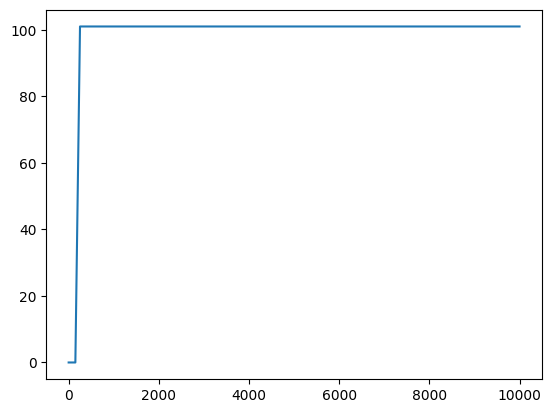

In [29]:
plt.plot(sum_rewards)
plt.savefig('frozen_lake8x8.png')